In [1]:
import os
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [2]:
os.chdir(os.path.join(os.getcwd(), "..", "data"));

In [3]:
random_state = np.random.seed(24)

In [4]:
df = pd.read_csv("final-preprocessed-data.csv");

In [5]:
df.shape

(71314, 69)

In [6]:
df.head()

,season,GW,at_home,player_id,opponent_id,champion_ls,top5_ls,bottom5_ls,promoted_ts,assists_pgw,...,threat_pgw,threat_rlf,threat_rsf,total_points_pgw,total_points_rlf,total_points_rsf,yellow_cards_pgw,yellow_cards_rlf,yellow_cards_rsf,total_points
0,2016,1,0,1,4,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
1,2016,1,1,2,17,0,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0
2,2016,1,1,4,9,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2.0
3,2016,1,0,6,13,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
4,2016,1,1,7,20,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0


In [7]:
df.dtypes

season                    int64
GW                        int64
at_home                   int64
player_id                 int64
opponent_id               int64
champion_ls               int64
top5_ls                   int64
bottom5_ls                int64
promoted_ts               int64
assists_pgw             float64
assists_rlf               int64
assists_rsf               int64
bonus_pgw               float64
bonus_rlf                 int64
bonus_rsf                 int64
bps_pgw                 float64
bps_rlf                   int64
bps_rsf                   int64
clean_sheets_pgw        float64
clean_sheets_rlf          int64
clean_sheets_rsf          int64
creativity_pgw          float64
creativity_rlf          float64
creativity_rsf          float64
goals_conceded_pgw      float64
goals_conceded_rlf        int64
goals_conceded_rsf        int64
goals_scored_pgw        float64
goals_scored_rlf          int64
goals_scored_rsf          int64
                         ...   
opponent

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,71314.0,2017.076170,0.914703,2016.00000,2016.00,2017.000000,2018.000000,2019.000000
GW,71314.0,19.412570,11.356374,1.00000,9.00,19.000000,29.000000,38.000000
at_home,71314.0,0.499607,0.500003,0.00000,0.00,0.000000,1.000000,1.000000
player_id,71314.0,488.582424,296.885284,1.00000,240.00,478.000000,702.000000,1213.000000
opponent_id,71314.0,12.050888,7.288860,1.00000,5.00,11.000000,18.000000,29.000000
champion_ls,71314.0,0.050341,0.218649,0.00000,0.00,0.000000,0.000000,1.000000
top5_ls,71314.0,0.250890,0.433529,0.00000,0.00,0.000000,1.000000,1.000000
bottom5_ls,71314.0,0.249222,0.432565,0.00000,0.00,0.000000,0.000000,1.000000
promoted_ts,71314.0,0.149550,0.356632,0.00000,0.00,0.000000,0.000000,1.000000
assists_pgw,71314.0,0.039039,0.209813,0.00000,0.00,0.000000,0.000000,3.000000


In [9]:
df.drop(["season", "GW"], axis=1, inplace=True)

In [10]:
X = df.loc[:, df.columns != "total_points"];
y = df.loc[:, df.columns == "total_points"];

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, 
                                                    random_state=random_state)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [12]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size=0.70, 
                                                    random_state=random_state)

In [13]:
scaler = StandardScaler()

In [14]:
X_train_scaled = scaler.fit_transform(X_train);

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [15]:
X_val_scaled = scaler.transform(X_val)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [16]:
print("X train shape: ", X_train.shape)
print("y train shape: ", y_train.shape)

X train shape:  (49919, 66)
y train shape:  (49919, 1)


In [17]:
print("X test shape: ", X_test.shape)
print("y test shape: ", y_test.shape)

X test shape:  (6419, 66)
y test shape:  (6419, 1)


In [18]:
print("X val shape: ", X_val.shape)
print("y val shape: ", y_val.shape)

X val shape:  (14976, 66)
y val shape:  (14976, 1)


In [19]:
def create_mlp(dim, dropout=0.1, l2_reg=0.01, regress=False):
    # define our MLP network
    model = Sequential();
    
    model.add(Dense(1024, input_dim=dim, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
    model.add(Dropout(dropout));
    model.add(Dense(512, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
    model.add(Dropout(dropout));
    model.add(Dense(256, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
    model.add(Dropout(dropout));
    model.add(Dense(128, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
    model.add(Dropout(dropout));
    model.add(Dense(64, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
    model.add(Dropout(dropout));
    model.add(Dense(32, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
    model.add(Dropout(dropout));
 
    # check to see if the regression node should be added
    if regress:
        model.add(Dense(1, activation="linear"));
 
    # return our model
    return model

In [20]:
model = create_mlp(X_train.shape[1], dropout=0.1, l2_reg=0.001, regress=True)
opt = keras.optimizers.Adam(lr=0.0001)
model.compile(loss="mean_squared_error", optimizer=opt);

W1002 23:44:01.855434 4333716928 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1002 23:44:01.868705 4333716928 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1002 23:44:01.870924 4333716928 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1002 23:44:01.886500 4333716928 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1002 23:44:01.893162 4333716928 deprecati

In [21]:
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=10,
                              verbose=0, mode='auto')

In [22]:
history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val),
                    epochs=500, shuffle=True, batch_size=128, callbacks=[es], verbose=1)

W1002 23:44:02.507397 4333716928 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 49919 samples, validate on 14976 samples
Epoch 1/500
49919/49919 [==============================] - 8s 162us/step - loss: 5.3886 - val_loss: 5.2175
Epoch 2/500
49919/49919 [==============================] - 7s 137us/step - loss: 5.1778 - val_loss: 5.1321
Epoch 3/500
49919/49919 [==============================] - 7s 133us/step - loss: 5.1089 - val_loss: 5.0825
Epoch 4/500
49919/49919 [==============================] - 7s 137us/step - loss: 5.0554 - val_loss: 5.0514
Epoch 5/500
49919/49919 [==============================] - 7s 138us/step - loss: 4.9982 - val_loss: 5.0027
Epoch 6/500
49919/49919 [==============================] - 7s 139us/step - loss: 4.9493 - val_loss: 4.9646
Epoch 7/500
49919/49919 [==============================] - 7s 139us/step - loss: 4.9018 - val_loss: 4.9098
Epoch 8/500
49919/49919 [==============================] - 7s 139us/step - loss: 4.8606 - val_loss: 4.8844
Epoch 9/500
49919/49919 [==============================] - 7s 138us/step - loss: 4.8009 - val_

49919/49919 [==============================] - 7s 137us/step - loss: 3.7009 - val_loss: 3.8364
Epoch 77/500
49919/49919 [==============================] - 7s 138us/step - loss: 3.7007 - val_loss: 3.8384
Epoch 78/500
49919/49919 [==============================] - 7s 139us/step - loss: 3.6912 - val_loss: 3.8331
Epoch 79/500
49919/49919 [==============================] - 7s 138us/step - loss: 3.6844 - val_loss: 3.8340
Epoch 80/500
49919/49919 [==============================] - 7s 138us/step - loss: 3.6925 - val_loss: 3.8299
Epoch 81/500
49919/49919 [==============================] - 7s 138us/step - loss: 3.6937 - val_loss: 3.8373
Epoch 82/500
49919/49919 [==============================] - 7s 138us/step - loss: 3.6913 - val_loss: 3.8433
Epoch 83/500
49919/49919 [==============================] - 7s 138us/step - loss: 3.6907 - val_loss: 3.8292
Epoch 84/500
49919/49919 [==============================] - 7s 138us/step - loss: 3.6837 - val_loss: 3.8368
Epoch 85/500
49919/49919 [===============

In [23]:
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [24]:
y_true = np.array(y_test["total_points"]);

In [25]:
y_pred = model.predict(X_test_scaled);

In [26]:
pred_df = pd.DataFrame({'Actual': y_true.flatten(), 'Predicted': y_pred.flatten()})

In [27]:
pred_df["in_range"] = pred_df.apply(lambda row: True if 
                                    (row["Actual"] - row["Predicted"]) <= 1 else False, axis=1)


In [28]:
print("In range: {0:.2f}".format(pred_df[pred_df["in_range"] == True].shape[0]/pred_df.shape[0]))

In range: 0.86


In [29]:
pred_df.head(25)

,Actual,Predicted,in_range
0,0.0,0.234362,True
1,0.0,0.449270,True
2,0.0,0.235139,True
3,0.0,0.736374,True
4,0.0,0.269079,True
5,0.0,0.188104,True
6,1.0,0.328339,True
7,0.0,3.413563,True
8,0.0,1.265652,True
9,6.0,1.977604,False


In [30]:
test_df = pred_df.head(25)

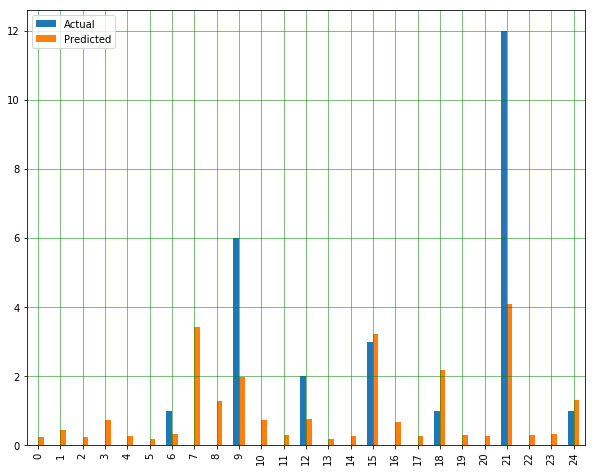

In [31]:
test_df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

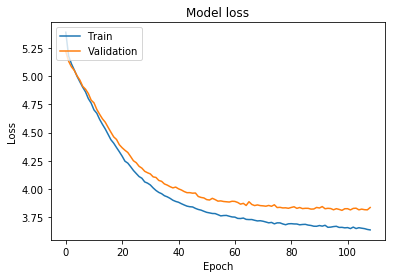

In [32]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [33]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.1375426375440851
R2 score: 0.28641988082582714
Mean Squared Error: 3.670540011864977
Root Mean Squared Error: 1.9158653428320522


In [34]:
player_id_df = pd.read_csv("player_id_map.csv");

In [35]:
team_id_df = pd.read_csv("team_id_map.csv");

In [36]:
# load and the test weekly fpl scrape
gw=8

In [37]:
gw_dir = os.path.join(os.getcwd(),"gw", str(gw))

In [38]:
if not os.path.exists(gw_dir):
    os.makedirs(gw_dir)

In [39]:
os.chdir(gw_dir)

In [40]:
weekly_scrape = pd.read_csv("gw{}-fpl-data.csv".format(gw));

In [41]:
X_test.columns

Index(['at_home', 'player_id', 'opponent_id', 'champion_ls', 'top5_ls',
       'bottom5_ls', 'promoted_ts', 'assists_pgw', 'assists_rlf',
       'assists_rsf', 'bonus_pgw', 'bonus_rlf', 'bonus_rsf', 'bps_pgw',
       'bps_rlf', 'bps_rsf', 'clean_sheets_pgw', 'clean_sheets_rlf',
       'clean_sheets_rsf', 'creativity_pgw', 'creativity_rlf',
       'creativity_rsf', 'goals_conceded_pgw', 'goals_conceded_rlf',
       'goals_conceded_rsf', 'goals_scored_pgw', 'goals_scored_rlf',
       'goals_scored_rsf', 'ict_index_pgw', 'ict_index_rlf', 'ict_index_rsf',
       'influence_pgw', 'influence_rlf', 'influence_rsf', 'minutes_pgw',
       'minutes_rlf', 'minutes_rsf', 'opponent_form', 'own_goals_pgw',
       'own_goals_rlf', 'own_goals_rsf', 'penalties_missed_pgw',
       'penalties_missed_rlf', 'penalties_missed_rsf', 'penalties_saved_pgw',
       'penalties_saved_rlf', 'penalties_saved_rsf', 'player_form',
       'red_cards_pgw', 'red_cards_rlf', 'red_cards_rsf', 'result_pgw',
       'result_

In [42]:
weekly_scrape_scaled = scaler.transform(weekly_scrape[X_test.columns]);

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [43]:
y_pred_weekly = model.predict(weekly_scrape_scaled);

In [44]:
y_pred_weekly_df = pd.DataFrame({'player_id': list(weekly_scrape["player_id"]), 
                                 'position': list(weekly_scrape["position"]),
                                 'predicted': y_pred_weekly.flatten()});


In [45]:
player_names = [];
opponent_names = [];

for index, row in weekly_scrape.iterrows():
    player_id = row["player_id"];
    opponent_id = row["opponent_id"];
    
    player_names.append(player_id_df[player_id_df["player_id"] == player_id]["actual_name"].iloc[0]);
    opponent_names.append(team_id_df[team_id_df["team_id"] == opponent_id]["team_name"].iloc[0]);

In [46]:
y_pred_weekly_df["player_name"] = player_names;
y_pred_weekly_df["opponent"] = opponent_names;

In [47]:
y_pred_weekly_df = y_pred_weekly_df[["player_id", "position", "player_name", "opponent", "predicted"]];

In [48]:
y_pred_weekly_df.sort_values(["predicted"], ascending=False)

,player_id,position,player_name,opponent,predicted
13,1206,FWD,Teemu Pukki,Aston Villa,3.925185
4,977,DEF,Issa Diop,Crystal Palace,3.555357
10,385,MID,Kevin De Bruyne,Wolverhampton Wanderers,3.487154
9,1178,MID,Mason Mount,Southampton,3.441488
3,514,DEF,Nicolás Otamendi,Wolverhampton Wanderers,3.261052
11,1208,MID,Todd Cantwell,Aston Villa,3.222514
6,1155,DEF,John Lundstram,Watford,2.840889
8,267,MID,Harry Wilson,Arsenal,1.787898
5,451,DEF,Martin Kelly,West Ham United,1.725124
0,176,GK,David de Gea,Newcastle United,1.695892


In [49]:
y_pred_weekly_df.to_csv("gw{}-predicted-data.csv".format(gw));

In [50]:
min_max_pos = {
    "GK": {
        "min": 1,
        "max": 1
    },
    "DEF": {
        "min": 3,
        "max": 5
    },
    "MID": {
        "min": 2,
        "max": 5
    },
    "FWD": {
        "min": 1,
        "max": 3
    }
}

In [51]:
def best11(df, max_players=11):
    selectedTeam = pd.DataFrame(columns=df.columns);
    positions = list(np.unique(df["position"]));
    
    # base cases - min 1 keeper, 3 def, 2 mids, 1 fwd
    for position in positions:
        df_ = df[df["position"] == position].sort_values(["predicted"], 
                                                         ascending=False).head(min_max_pos[position]["min"]);
        selectedTeam = selectedTeam.append(df_);
        
    gk_ind = positions.index("GK");
    del positions[gk_ind];
    
    num_players = selectedTeam.shape[0];
    
    # recursive case - max 5 def, 5 mids, 3 fwd
    while num_players < max_players:
        num_def = selectedTeam[selectedTeam["position"] == "DEF"].shape[0];
        num_mid = selectedTeam[selectedTeam["position"] == "MID"].shape[0];
        num_fwd = selectedTeam[selectedTeam["position"] == "FWD"].shape[0];
        
        candidates=[]

        for position in positions:
            num_position = selectedTeam[selectedTeam["position"] == position].shape[0];
            
            if (num_position < min_max_pos[position]["max"]):
                df_ = df[df["position"] == position].sort_values(["predicted"], ascending=False).head(selectedTeam[selectedTeam["position"] == position].shape[0] + 1).tail(1)
                candidates.append(df_)
    
        max_score = candidates[0]["predicted"].iloc[0]
        best_player = candidates[0]
        
        for index in range(len(candidates)):
            score = candidates[index]["predicted"].iloc[0]
            if (score > max_score):
                max_score = score
                best_player = candidates[index]
        
        selectedTeam = selectedTeam.append(best_player);
        
        num_players = num_players + 1;
        
    
    best11 = pd.DataFrame(columns=selectedTeam.columns);
    best11 = best11.append(selectedTeam[selectedTeam["position"] == "GK"]);
    best11 = best11.append(selectedTeam[selectedTeam["position"] == "DEF"]);
    best11 = best11.append(selectedTeam[selectedTeam["position"] == "MID"]);
    best11 = best11.append(selectedTeam[selectedTeam["position"] == "FWD"]);
    
    best11["predicted"] = best11["predicted"].apply(lambda predicted: round(predicted, 0))
    
    return best11


In [52]:
best11 = best11(y_pred_weekly_df)

In [53]:
best11

,player_id,position,player_name,opponent,predicted
0,176,GK,David de Gea,Newcastle United,2.0
4,977,DEF,Issa Diop,Crystal Palace,4.0
3,514,DEF,Nicolás Otamendi,Wolverhampton Wanderers,3.0
6,1155,DEF,John Lundstram,Watford,3.0
5,451,DEF,Martin Kelly,West Ham United,2.0
10,385,MID,Kevin De Bruyne,Wolverhampton Wanderers,3.0
9,1178,MID,Mason Mount,Southampton,3.0
11,1208,MID,Todd Cantwell,Aston Villa,3.0
8,267,MID,Harry Wilson,Arsenal,2.0
13,1206,FWD,Teemu Pukki,Aston Villa,4.0


In [54]:
sum(best11["predicted"])

31.0

In [55]:
best11.to_csv("gw{}-best11.csv".format(gw), index=False);